#📌 Extracción de datos

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
datos_telecomx = pd.read_json(url)
datos_telecomx.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

### Listado de columnas del DataFrame

In [ ]:
datos_telecomx.columns.tolist()

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

### Información general del DataFrame

In [ ]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Identificación de columnas anidadas (diccionarios)

In [ ]:
columnas = list(datos_telecomx.columns)

for columna in columnas:
  if isinstance(datos_telecomx.loc[1, columna], dict):
    print("El diccionario ", columna, " contiene:")
    print(list(datos_telecomx.loc[1, columna].keys()))

El diccionario  customer  contiene:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
El diccionario  phone  contiene:
['PhoneService', 'MultipleLines']
El diccionario  internet  contiene:
['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
El diccionario  account  contiene:
['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


### Construcción del DataFrame final normalizado

In [ ]:
df_telecomx = pd.DataFrame()

for columna in columnas:
  if isinstance(datos_telecomx.loc[2, columna], dict):
    df_columna = pd.json_normalize(datos_telecomx[columna])
    df_columna.columns = [f"{columna}.{sub}" for sub in df_columna.columns]
    df_telecomx = pd.concat([df_telecomx, df_columna], axis=1)
  else:
    df_telecomx = pd.concat([df_telecomx, datos_telecomx[[columna]]], axis=1)

df_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Información del DataFrame expandido

In [ ]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Exploración de valores únicos por columna

In [ ]:
for columna in list(df_telecomx.columns)[1:]:
  print("La columna ", columna, " contiene los siguientes datos unicos:")
  print(list(df_telecomx[columna].unique()))
  print()

La columna  Churn  contiene los siguientes datos unicos:
['No', 'Yes', '']

La columna  customer.gender  contiene los siguientes datos unicos:
['Female', 'Male']

La columna  customer.SeniorCitizen  contiene los siguientes datos unicos:
[np.int64(0), np.int64(1)]

La columna  customer.Partner  contiene los siguientes datos unicos:
['Yes', 'No']

La columna  customer.Dependents  contiene los siguientes datos unicos:
['Yes', 'No']

La columna  customer.tenure  contiene los siguientes datos unicos:
[np.int64(9), np.int64(4), np.int64(13), np.int64(3), np.int64(71), np.int64(63), np.int64(7), np.int64(65), np.int64(54), np.int64(72), np.int64(5), np.int64(56), np.int64(34), np.int64(1), np.int64(45), np.int64(50), np.int64(23), np.int64(55), np.int64(26), np.int64(69), np.int64(11), np.int64(37), np.int64(49), np.int64(66), np.int64(67), np.int64(20), np.int64(43), np.int64(59), np.int64(12), np.int64(27), np.int64(2), np.int64(25), np.int64(29), np.int64(14), np.int64(35), np.int64(64), n

### Reemplazo de valores vacíos y conversión de tipos

In [ ]:
df_telecomx = df_telecomx.replace(["", " "], np.nan)
df_telecomx['account.Charges.Total'] = df_telecomx['account.Charges.Total'].astype(np.float64)
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Columnas más relevantes para el análisis de evasión

In [ ]:
df_evasion = df_telecomx[["customerID", "Churn", "customer.tenure", "account.Contract", "account.PaymentMethod",
                          "account.PaperlessBilling", "account.Charges.Monthly", "account.Charges.Total",
                          "internet.InternetService", "internet.OnlineSecurity", "internet.OnlineBackup",
                          "internet.DeviceProtection", "internet.TechSupport", "phone.MultipleLines"]]
df_evasion.head()

,customerID,Churn,customer.tenure,account.Contract,account.PaymentMethod,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,phone.MultipleLines
0,0002-ORFBO,No,9,One year,Mailed check,Yes,65.6,593.30,DSL,No,Yes,No,Yes,No
1,0003-MKNFE,No,9,Month-to-month,Mailed check,No,59.9,542.40,DSL,No,No,No,No,Yes
2,0004-TLHLJ,Yes,4,Month-to-month,Electronic check,Yes,73.9,280.85,Fiber optic,No,No,Yes,No,No
3,0011-IGKFF,Yes,13,Month-to-month,Electronic check,Yes,98.0,1237.85,Fiber optic,No,Yes,Yes,No,No
4,0013-EXCHZ,Yes,3,Month-to-month,Mailed check,Yes,83.9,267.40,Fiber optic,No,No,No,Yes,No


### Cálculo de cargos diarios aproximados

In [ ]:
df_telecomx["Cuentas_Diarias"] = (df_telecomx["account.Charges.Monthly"] / 30.44).round(2)
df_telecomx["Cuentas_Diarias"].head()

,Cuentas_Diarias
0,2.16
1,1.97
2,2.43
3,3.22
4,2.76


#📊 Carga y análisis

### Descripción estadística general de los datos

In [ ]:
df_telecomx.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043,2,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone.MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Gráfico de proporción de clientes con y sin evasión

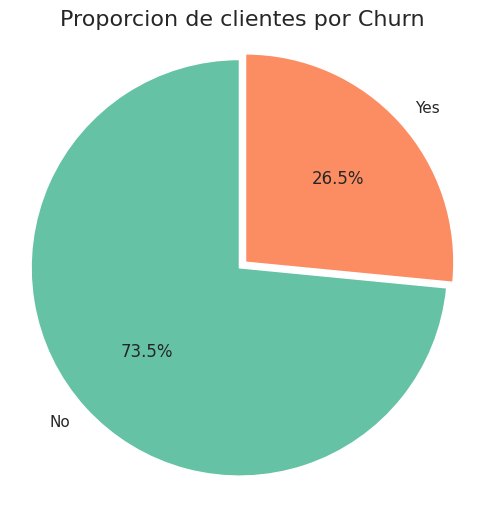

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(6, 6))
df_telecomx['Churn'].value_counts().plot.pie( autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90, explode=(0.04, 0))
plt.ylabel('')
plt.title('Proporcion de clientes por Churn', fontsize=16)
plt.axis('equal')
plt.show()


### Distribución de evasión por tipo de contrato

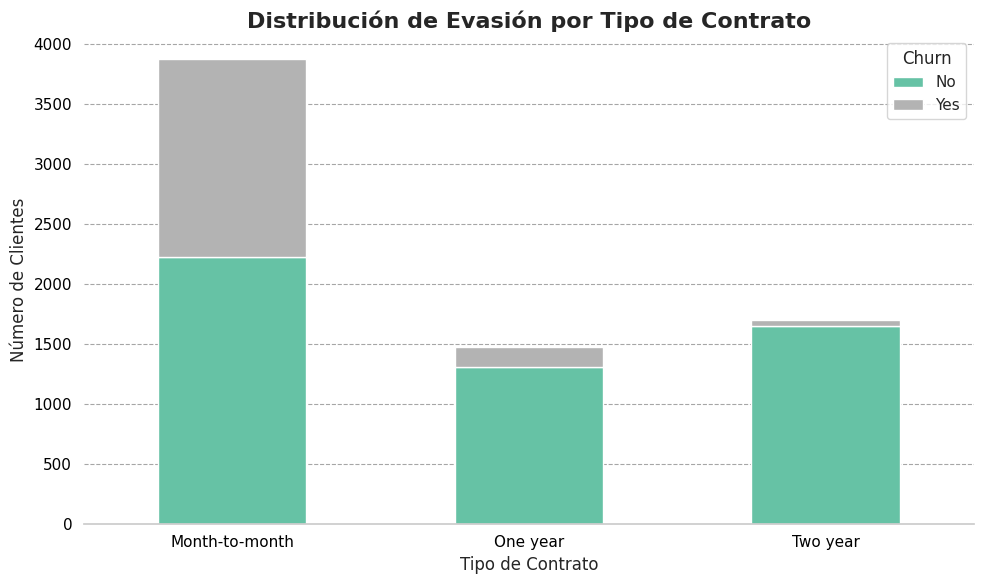

In [ ]:
churn_categoria = df_telecomx.groupby(['account.Contract', 'Churn']).size().unstack()

ax = churn_categoria.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)

plt.title('Distribución de Evasión por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.legend(title='Churn')

ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7, linewidth=0.8)
ax.grid(False, axis='x')

plt.tight_layout()
plt.show()



### Distribución del total gastado según evasión

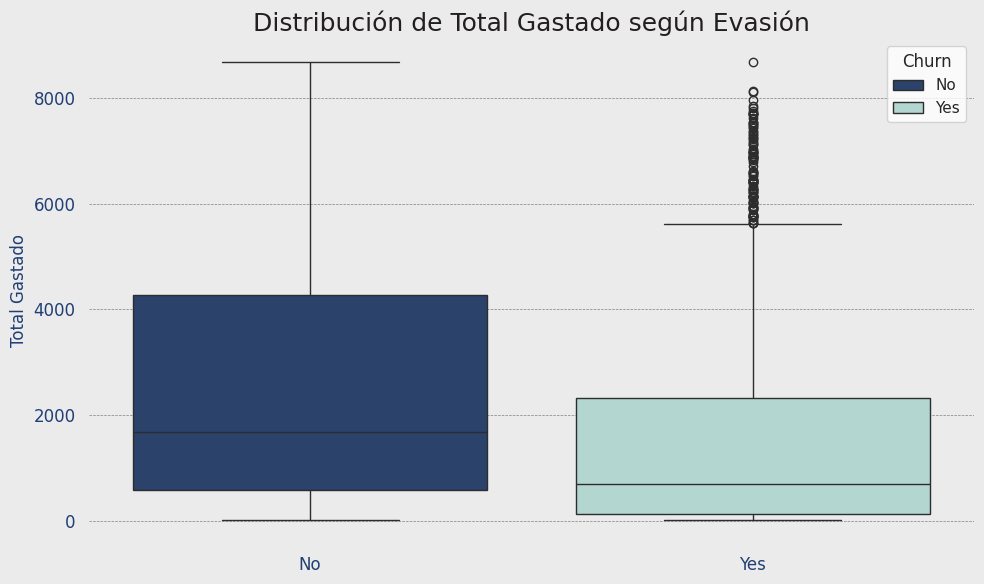

In [ ]:
plt.figure(figsize=(10, 6), facecolor='#ebebeb')
ax = plt.axes()
ax.set_facecolor('#ebebeb')
sns.boxplot(data=df_telecomx, x='Churn', y='account.Charges.Total', hue='Churn', palette=['#203f75', '#addcd4'], ax=ax)

plt.title('Distribución de Total Gastado según Evasión', fontsize=18, color='#231f20')

plt.xlabel('')
plt.ylabel('Total Gastado', fontsize=12, color='#203f75')
plt.xticks(fontsize=12, color='#203f75')
plt.yticks(fontsize=12, color='#203f75')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


#📄Informe final

# Informe de Análisis de Evasión de Clientes (Churn)

---

## Introducción
El presente análisis tiene como objetivo comprender los factores relacionados con la **evasión de clientes (Churn)** en la empresa de telecomunicaciones **TelecomX**.  
La evasión de clientes representa un desafío clave en la industria, ya que afecta directamente la rentabilidad y sostenibilidad del negocio. Identificar patrones asociados al abandono permite diseñar estrategias efectivas para retener clientes.

---

## Limpieza y Tratamiento de Datos
1. **Extracción**:  
   - Se cargaron los datos desde un archivo en formato JSON.  
   - Los datos incluían información de clientes, servicios contratados, métodos de pago y montos facturados.  

2. **Transformación**:  
   - Se identificaron columnas anidadas en formato de diccionarios (`customer`, `phone`, `internet`, `account`), que fueron normalizadas.  
   - El dataset se expandió de **6 columnas originales** a **21 columnas procesadas**.  

3. **Tratamiento de valores**:  
   - Se reemplazaron valores vacíos (`""`, `" "`) por `NaN`.  
   - Se corrigió el tipo de dato de la columna `account.Charges.Total` a formato numérico (`float64`).  
   - Se eliminaron inconsistencias y se calcularon métricas adicionales, como **Cuentas_Diarias** (cargos diarios aproximados).  

---

## Análisis Exploratorio de Datos

1. **Proporción de Churn**  
   - El **26.5% de los clientes abandonó el servicio**, mientras que el **73.5% permaneció activo**.  
   - Esto indica una tasa de evasión significativa que debe atenderse.  

2. **Churn según tipo de contrato**  
   - Los clientes con contratos **mensuales (Month-to-month)** presentan la mayor evasión.  
   - Los contratos a **1 año** y **2 años** muestran menor abandono, lo que sugiere que la duración del contrato influye en la fidelidad.  

3. **Total gastado según evasión**  
   - Los clientes que se mantuvieron (`No Churn`) muestran un **gasto acumulado significativamente mayor** que aquellos que abandonaron.  
   - Los clientes que se fueron tienden a tener un historial de **bajo gasto total**, aunque con algunos valores atípicos elevados.  

   *(Gráfico de caja mostrado en el análisis.)*

---

## Conclusiones e Insights
- La **evasión se concentra en clientes con contratos mensuales**, lo cual sugiere una falta de compromiso a largo plazo.  
- Los **clientes de mayor antigüedad y gasto total** son más propensos a permanecer en la empresa.  
- Los métodos de pago electrónicos y facturación sin papel podrían estar asociados a mayor evasión (requiere análisis adicional).  
- La fidelización está fuertemente vinculada con el **tipo de contrato** y el **valor del cliente en el tiempo**.  

---

## Recomendaciones
1. **Fomentar contratos de largo plazo** mediante descuentos o beneficios exclusivos para clientes que migren de contratos mensuales a anuales o bianuales.  
2. **Programas de fidelización** dirigidos a clientes con bajo gasto mensual pero potencial de crecimiento.  
3. **Mejorar la experiencia en servicios clave** (internet, soporte técnico, seguridad online), ya que estos influyen directamente en la satisfacción.  
4. **Análisis de medios de pago**: evaluar si ciertos métodos están correlacionados con mayor churn y considerar campañas personalizadas.  
5. **Alertas tempranas de evasión**: construir modelos predictivos que detecten clientes con riesgo de abandonar y aplicar retención proactiva.  

---

Con este análisis se han identificado **patrones claros de evasión** y se han planteado **acciones estratégicas para reducir el churn**, mejorando la sostenibilidad del negocio.
